In [19]:
import pandas as pd
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import sklearn.datasets as dta

In [20]:
csv_path = r'Us_Accidents_Arizona_DEC20.csv'

In [21]:
us_data_df = pd.read_csv(csv_path)
us_data_cleaned = us_data_df[['ID','TMC','Severity','Start_Time','End_Time','City','County','State','Zipcode','Country','Temperature(F)','Visibility(mi)','Wind_Speed(mph)','Precipitation(in)','Weather_Condition','Sunrise_Sunset','Stop','Traffic_Signal']]
us_data_cleaned

,ID,TMC,Severity,Start_Time,End_Time,City,County,State,Zipcode,Country,Temperature(F),Visibility(mi),Wind_Speed(mph),Precipitation(in),Weather_Condition,Sunrise_Sunset,Stop,Traffic_Signal
0,A-513395,201,2,12/31/2020 8:33,12/31/2020 9:18,Sun City West,Maricopa,AZ,85375-1800,US,43.0,10.0,5.0,0.0,Cloudy,Day,False,True
1,A-513396,201,2,12/31/2020 9:32,12/31/2020 11:03,Wickenburg,Maricopa,AZ,85390-3367,US,45.0,10.0,3.0,0.0,Light Drizzle,Day,False,False
2,A-513397,201,2,12/31/2020 12:54,12/31/2020 19:20,Lake Havasu City,Mohave,AZ,86404,US,60.0,10.0,12.0,0.0,Fair,Day,True,False
3,A-513398,201,3,12/31/2020 16:04,12/31/2020 17:28,Avondale,Maricopa,AZ,85323,US,57.0,10.0,5.0,NaN,Cloudy,Day,False,False
4,A-513399,201,2,12/31/2020 18:47,12/31/2020 19:48,Prescott,Yavapai,AZ,86303,US,36.0,10.0,6.0,0.0,Cloudy,Night,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15092,A-1048129,201,2,10/9/2019 21:08,10/9/2019 21:57,Glendale,Maricopa,AZ,85307,US,86.0,10.0,0.0,0.0,Fair,Night,False,True
15093,A-1048130,201,2,10/9/2019 21:10,10/9/2019 21:58,Tucson,Pima,AZ,85712,US,75.0,10.0,6.0,0.0,Fair,Night,False,True
15094,A-1048131,201,2,10/9/2019 21:11,10/9/2019 21:58,Tempe,Maricopa,AZ,85283,US,88.0,10.0,10.0,0.0,Partly Cloudy,Night,False,False
15095,A-1048132,201,2,10/9/2019 21:10,10/9/2019 21:57,Tempe,Maricopa,AZ,85281-3715,US,88.0,10.0,10.0,0.0,Partly Cloudy,Night,False,False


In [22]:
us_data_cleaned = us_data_cleaned.dropna(how="any")
us_data_maricopa = us_data_cleaned.loc[us_data_cleaned['County'] == 'Maricopa']
us_data_maricopa

,ID,TMC,Severity,Start_Time,End_Time,City,County,State,Zipcode,Country,Temperature(F),Visibility(mi),Wind_Speed(mph),Precipitation(in),Weather_Condition,Sunrise_Sunset,Stop,Traffic_Signal
0,A-513395,201,2,12/31/2020 8:33,12/31/2020 9:18,Sun City West,Maricopa,AZ,85375-1800,US,43.0,10.0,5.0,0.0,Cloudy,Day,False,True
1,A-513396,201,2,12/31/2020 9:32,12/31/2020 11:03,Wickenburg,Maricopa,AZ,85390-3367,US,45.0,10.0,3.0,0.0,Light Drizzle,Day,False,False
5,A-513400,201,2,12/31/2020 4:52,12/31/2020 6:07,Phoenix,Maricopa,AZ,85027-4008,US,40.0,10.0,0.0,0.0,Fair,Night,False,True
8,A-513403,201,2,12/31/2020 6:40,12/31/2020 7:10,Phoenix,Maricopa,AZ,85020-1812,US,40.0,10.0,0.0,0.0,Fair,Night,False,False
9,A-513404,201,2,12/31/2020 6:54,12/31/2020 7:24,Phoenix,Maricopa,AZ,85022,US,39.0,10.0,0.0,0.0,Fair,Night,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15088,A-1048125,201,3,10/9/2019 19:45,10/9/2019 21:01,Phoenix,Maricopa,AZ,85034,US,89.0,10.0,13.0,0.0,Fair,Night,False,False
15090,A-1048127,201,3,10/9/2019 19:46,10/9/2019 21:03,Phoenix,Maricopa,AZ,85034,US,89.0,10.0,13.0,0.0,Fair,Night,False,False
15092,A-1048129,201,2,10/9/2019 21:08,10/9/2019 21:57,Glendale,Maricopa,AZ,85307,US,86.0,10.0,0.0,0.0,Fair,Night,False,True
15094,A-1048131,201,2,10/9/2019 21:11,10/9/2019 21:58,Tempe,Maricopa,AZ,85283,US,88.0,10.0,10.0,0.0,Partly Cloudy,Night,False,False


In [27]:
#Update the Start_Time and End_Time columns formatting to remove time stamp
us_data_maricopa['Start_Time']=us_data_maricopa['Start_Time'].str.split(' ', expand=True)[0]
us_data_maricopa['End_Time']=us_data_maricopa['End_Time'].str.split(' ', expand=True)[0]
us_data_maricopa['Zipcode']=us_data_maricopa['Zipcode'].str.split('-', expand=True)[0]
us_data_maricopa

C:\Users\ashle\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ashle\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ashle\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

,ID,TMC,Severity,Start_Time,End_Time,City,County,State,Zipcode,Country,Temperature(F),Visibility(mi),Wind_Speed(mph),Precipitation(in),Weather_Condition,Sunrise_Sunset,Stop,Traffic_Signal
0,A-513395,201,2,12/31/2020,12/31/2020,Sun City West,Maricopa,AZ,85375,US,43.0,10.0,5.0,0.0,Cloudy,Day,False,True
1,A-513396,201,2,12/31/2020,12/31/2020,Wickenburg,Maricopa,AZ,85390,US,45.0,10.0,3.0,0.0,Light Drizzle,Day,False,False
5,A-513400,201,2,12/31/2020,12/31/2020,Phoenix,Maricopa,AZ,85027,US,40.0,10.0,0.0,0.0,Fair,Night,False,True
8,A-513403,201,2,12/31/2020,12/31/2020,Phoenix,Maricopa,AZ,85020,US,40.0,10.0,0.0,0.0,Fair,Night,False,False
9,A-513404,201,2,12/31/2020,12/31/2020,Phoenix,Maricopa,AZ,85022,US,39.0,10.0,0.0,0.0,Fair,Night,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15088,A-1048125,201,3,10/9/2019,10/9/2019,Phoenix,Maricopa,AZ,85034,US,89.0,10.0,13.0,0.0,Fair,Night,False,False
15090,A-1048127,201,3,10/9/2019,10/9/2019,Phoenix,Maricopa,AZ,85034,US,89.0,10.0,13.0,0.0,Fair,Night,False,False
15092,A-1048129,201,2,10/9/2019,10/9/2019,Glendale,Maricopa,AZ,85307,US,86.0,10.0,0.0,0.0,Fair,Night,False,True
15094,A-1048131,201,2,10/9/2019,10/9/2019,Tempe,Maricopa,AZ,85283,US,88.0,10.0,10.0,0.0,Partly Cloudy,Night,False,False


In [29]:
#convert dates
us_data_maricopa['End_Time'] = pd.to_datetime(us_data_maricopa['End_Time'])
us_data_maricopa['Start_Time'] = pd.to_datetime(us_data_maricopa['Start_Time'])

C:\Users\ashle\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ashle\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [32]:
#creating new columns for Month and Day to create seasons columns
us_data_maricopa["month"] = pd.DatetimeIndex(us_data_maricopa["Start_Time"]).month
us_data_maricopa["day"] = pd.DatetimeIndex(us_data_maricopa["Start_Time"]).day
us_data_maricopa["season"] = ""
us_data_maricopa

C:\Users\ashle\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ashle\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ashle\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

,ID,TMC,Severity,Start_Time,End_Time,City,County,State,Zipcode,Country,...,Visibility(mi),Wind_Speed(mph),Precipitation(in),Weather_Condition,Sunrise_Sunset,Stop,Traffic_Signal,month,day,season
0,A-513395,201,2,2020-12-31,2020-12-31,Sun City West,Maricopa,AZ,85375,US,...,10.0,5.0,0.0,Cloudy,Day,False,True,12,31,
1,A-513396,201,2,2020-12-31,2020-12-31,Wickenburg,Maricopa,AZ,85390,US,...,10.0,3.0,0.0,Light Drizzle,Day,False,False,12,31,
5,A-513400,201,2,2020-12-31,2020-12-31,Phoenix,Maricopa,AZ,85027,US,...,10.0,0.0,0.0,Fair,Night,False,True,12,31,
8,A-513403,201,2,2020-12-31,2020-12-31,Phoenix,Maricopa,AZ,85020,US,...,10.0,0.0,0.0,Fair,Night,False,False,12,31,
9,A-513404,201,2,2020-12-31,2020-12-31,Phoenix,Maricopa,AZ,85022,US,...,10.0,0.0,0.0,Fair,Night,False,True,12,31,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15088,A-1048125,201,3,2019-10-09,2019-10-09,Phoenix,Maricopa,AZ,85034,US,...,10.0,13.0,0.0,Fair,Night,False,False,10,9,
15090,A-1048127,201,3,2019-10-09,2019-10-09,Phoenix,Maricopa,AZ,85034,US,...,10.0,13.0,0.0,Fair,Night,False,False,10,9,
15092,A-1048129,201,2,2019-10-09,2019-10-09,Glendale,Maricopa,AZ,85307,US,...,10.0,0.0,0.0,Fair,Night,False,True,10,9,
15094,A-1048131,201,2,2019-10-09,2019-10-09,Tempe,Maricopa,AZ,85283,US,...,10.0,10.0,0.0,Partly Cloudy,Night,False,False,10,9,


In [37]:
#inserting seasons columns based on month and day
us_data_maricopa.loc[(us_data_maricopa["month"] == 1), ["season"]] = "Winter"
us_data_maricopa.loc[(us_data_maricopa["month"] == 2), ["season"]] = "Winter"
us_data_maricopa.loc[(us_data_maricopa["month"] >= 3) & (us_data_maricopa["month"] <= 5), ["season"]] = "Spring"
us_data_maricopa.loc[(us_data_maricopa["month"] >= 6) & (us_data_maricopa["month"] <= 8), ["season"]] = "Summer"

us_data_maricopa.loc[(us_data_maricopa["month"] >= 9) & (us_data_maricopa["month"] <= 11), ["season"]] = "Autumn"

us_data_maricopa.loc[(us_data_maricopa["month"] == 12), ["season"]] = "Winter"
us_data_maricopa

C:\Users\ashle\anaconda3\envs\pythondata\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\ashle\anaconda3\envs\pythondata\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\ashle\anaconda3\envs\pythondata\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

,ID,TMC,Severity,Start_Time,End_Time,City,County,State,Zipcode,Country,...,Visibility(mi),Wind_Speed(mph),Precipitation(in),Weather_Condition,Sunrise_Sunset,Stop,Traffic_Signal,month,day,season
0,A-513395,201,2,2020-12-31,2020-12-31,Sun City West,Maricopa,AZ,85375,US,...,10.0,5.0,0.0,Cloudy,Day,False,True,12,31,Winter
1,A-513396,201,2,2020-12-31,2020-12-31,Wickenburg,Maricopa,AZ,85390,US,...,10.0,3.0,0.0,Light Drizzle,Day,False,False,12,31,Winter
5,A-513400,201,2,2020-12-31,2020-12-31,Phoenix,Maricopa,AZ,85027,US,...,10.0,0.0,0.0,Fair,Night,False,True,12,31,Winter
8,A-513403,201,2,2020-12-31,2020-12-31,Phoenix,Maricopa,AZ,85020,US,...,10.0,0.0,0.0,Fair,Night,False,False,12,31,Winter
9,A-513404,201,2,2020-12-31,2020-12-31,Phoenix,Maricopa,AZ,85022,US,...,10.0,0.0,0.0,Fair,Night,False,True,12,31,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15088,A-1048125,201,3,2019-10-09,2019-10-09,Phoenix,Maricopa,AZ,85034,US,...,10.0,13.0,0.0,Fair,Night,False,False,10,9,Autumn
15090,A-1048127,201,3,2019-10-09,2019-10-09,Phoenix,Maricopa,AZ,85034,US,...,10.0,13.0,0.0,Fair,Night,False,False,10,9,Autumn
15092,A-1048129,201,2,2019-10-09,2019-10-09,Glendale,Maricopa,AZ,85307,US,...,10.0,0.0,0.0,Fair,Night,False,True,10,9,Autumn
15094,A-1048131,201,2,2019-10-09,2019-10-09,Tempe,Maricopa,AZ,85283,US,...,10.0,10.0,0.0,Partly Cloudy,Night,False,False,10,9,Autumn


In [ ]:
#drop off Oct and Nov 2019- to ensure equal data for seasons


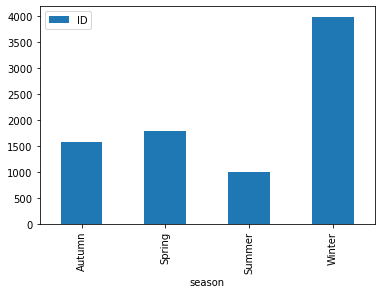

In [49]:
#Average Number of accidents per month/season
#create a new column with if/then based on date to categorize into seasons
#create bar graph 
season_count = us_data_maricopa.groupby('season').count()
season_count_clean = season_count['ID']
season_count_clean = pd.DataFrame(season_count_clean)
season_count_clean.plot(kind='bar', title='Number Of Accidents per Season')

plt.show()

In [25]:
#Highest Accident per day -- table to show
#groupby start_time column


In [26]:
#